# Transactional Analysis and Plotting

## Once again, first things first import my libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('transaction_data.csv')

### Displays the first 10 transactions

In [2]:
df.head(10)

,TransactionID,CustID,Date,Employee,ProductID,ProductName,VendorID,ProductVendor,UnitPrice,Quantity,Subtotal,Tax(8%),OrderTotal
0,10258,1,7/17/2023,Nancy Davolio,32,Mascarpone Fabioli,14,Formaggi Fortini s.r.l.,25.6,6,153.6,12.29,165.89
1,10275,2,8/7/2023,Nancy Davolio,24,Guaran Fantstica,10,Refrescos Americanas LTDA,3.6,12,43.2,3.46,46.66
2,10275,2,8/7/2023,Nancy Davolio,59,Raclette Courdavault,28,Gai pturage,44.0,6,264.0,21.12,285.12
3,10292,3,8/28/2023,Nancy Davolio,20,Sir Rodney's Marmalade,8,"Specialty Biscuits, Ltd.",64.8,20,1296.0,103.68,1399.68
4,10293,4,8/29/2023,Nancy Davolio,18,Carnarvon Tigers,7,"Pavlova, Ltd.",50.0,12,600.0,48.00,648.00
5,10293,4,8/29/2023,Nancy Davolio,24,Guaran Fantstica,10,Refrescos Americanas LTDA,3.6,10,36.0,2.88,38.88
6,10293,4,8/29/2023,Nancy Davolio,63,Vegie-spread,7,"Pavlova, Ltd.",35.1,5,175.5,14.04,189.54
7,10293,4,8/29/2023,Nancy Davolio,75,Rhnbru Klosterbier,12,Plutzer Lebensmittelgromrkte AG,6.2,6,37.2,2.98,40.18
8,10304,4,9/12/2023,Nancy Davolio,59,Raclette Courdavault,28,Gai pturage,44.0,10,440.0,35.20,475.20
9,10304,4,9/12/2023,Nancy Davolio,71,Flotemysost,15,Norske Meierier,17.2,2,34.4,2.75,37.15


## Displays the Top 8 Statistical Metrics of file

In [3]:
df[['UnitPrice', 'Quantity', 'Subtotal', 'Tax(8%)', 'OrderTotal']].describe().round(2)

,UnitPrice,Quantity,Subtotal,Tax(8%),OrderTotal
count,1353.00,1353.00,1353.00,1353.00,1353.00
mean,25.91,12.63,324.54,25.96,350.50
std,28.61,6.40,403.98,32.32,436.30
min,2.00,1.00,4.80,0.38,5.18
25%,12.00,7.00,100.00,8.00,108.00
50%,18.40,12.00,210.00,16.80,226.80
75%,31.23,20.00,394.00,31.52,425.52
max,263.50,24.00,4216.00,337.28,4553.28


## Top 10 Most Frequent Transaction Days

### This analysis is useful for identifying peak transaction days, which could help in planning resources, managing staff, or preparing for future high-transaction days.

**Counts the total number of transactions by day**

In [4]:
top_transaction_days = df['Date'].value_counts().head(10)
top_transaction_days

Date
5/6/2025      31
2/26/2025     12
4/3/2025       8
5/5/2025       8
3/26/2025      8
1/13/2025      8
1/14/2025      8
12/30/2024     7
1/15/2025      7
8/27/2023      7
Name: count, dtype: int64

## Top 10 months with the highest average transactions

### This analysis is useful for identifying peak months in sales performance or customer spending trends.

**Convert the Date Column to Datetime Format**

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

**Calculate the Monthly Average Transaction Totals**

In [6]:
monthly_avg_transaction = df.resample('ME', on='Date')['OrderTotal'].mean()

**Find the Top 10 Months with the Highest Average Transaction Totals**

In [7]:
top_10_months = monthly_avg_transaction.sort_values(ascending=False).head(10)

In [8]:
print(top_10_months) 

Date
2024-12-31    448.513919
2024-08-31    418.735000
2024-07-31    417.017917
2024-09-30    407.451071
2023-11-30    398.351026
2024-06-30    390.779804
2023-12-31    386.296531
2024-11-30    364.035714
2025-04-30    362.808302
2025-01-31    361.146633
Name: OrderTotal, dtype: float64


## Average Transaction Amount by Category

### This analysis helps identify which products tend to generate the highest transaction totals on average, useful for optimizing inventory, pricing, or promotions for those top-performing products.

**Calculate the Average Transaction Total per Product Category**

In [9]:
avg_transaction_per_category = df.groupby('ProductName')['OrderTotal'].mean()

**Find the Top 10 Product Categories with the Highest Average Transaction Totals**

In [10]:
top_categories = avg_transaction_per_category.sort_values(ascending=False).head(10)
top_categories 

ProductName
Cte de Blaye                  2822.085000
Thringer Rostbratwurst        1736.659130
Sir Rodney's Marmalade        1081.835833
Mishi Kobe Niku               1073.790000
Carnarvon Tigers               817.147059
Manjimup Dried Apples          677.633846
Ipoh Coffee                    633.289474
Northwoods Cranberry Sauce     629.485714
Raclette Courdavault           610.280000
Tarte au sucre                 608.921290
Name: OrderTotal, dtype: float64

## Customer Transaction Count and Total Spending

### This summary is useful for identifying the highest-spending customers, which can inform marketing strategies, loyalty programs, or customer relationship management initiatives.

**Group the Data by Customer ID**

In [11]:
customer_summary = df.groupby('CustID').agg(
    total_transactions = ('OrderTotal', 'count'),
    total_spend = ('OrderTotal', 'sum') # Aggregate Data: Calculate Total Transactions and Total Spend per Customer

).sort_values(by='total_spend', ascending=False).head(10) #Sort by Total Spend in Descending Order

customer_summary

,total_transactions,total_spend
CustID,,
27,37,16291.91
1,31,16253.45
17,34,13460.68
15,19,13234.00
80,26,12985.40
9,30,12348.12
59,21,12111.98
4,26,10611.17
8,24,10443.49


## Customer Transaction Count and Total Spending with Employee Recognition!

### This Analysis provides valuable insights for customer and employee relationship management:

**Identify Top Customers, Employee-Customer Relationships, and Sales and Service Optimization**

In [12]:
customer_summary = df.groupby('CustID').agg(
    total_transactions=('OrderTotal', 'count'),
    total_spend=('OrderTotal', 'sum'),
    top_employee_by_transactions=('Employee', lambda x: x.mode()[0]),
    top_employee_by_spend=('Employee', lambda x: x.loc[x.idxmax()])
).sort_values(by='total_spend', ascending=False).head(10)
customer_summary

,total_transactions,total_spend,top_employee_by_transactions,top_employee_by_spend
CustID,,,,
27,37,16291.91,Janet Leverling,Steven Buchanan
1,31,16253.45,Margaret Peacock,Robert King
17,34,13460.68,Michael Suyama,Steven Buchanan
15,19,13234.00,Laura Callahan,Robert King
80,26,12985.40,Margaret Peacock,Robert King
9,30,12348.12,Margaret Peacock,Steven Buchanan
59,21,12111.98,Janet Leverling,Nancy Davolio
4,26,10611.17,Nancy Davolio,Robert King
8,24,10443.49,Nancy Davolio,Nancy Davolio


## Pie Chart of Top 10 Transactions by Category

### Visualizes the proportion of transactions by the Top 10 cateogories

### Quick insights into which categories are performing well and assisting in strategic decision-making related to product focus, marketing, and customer targeting.

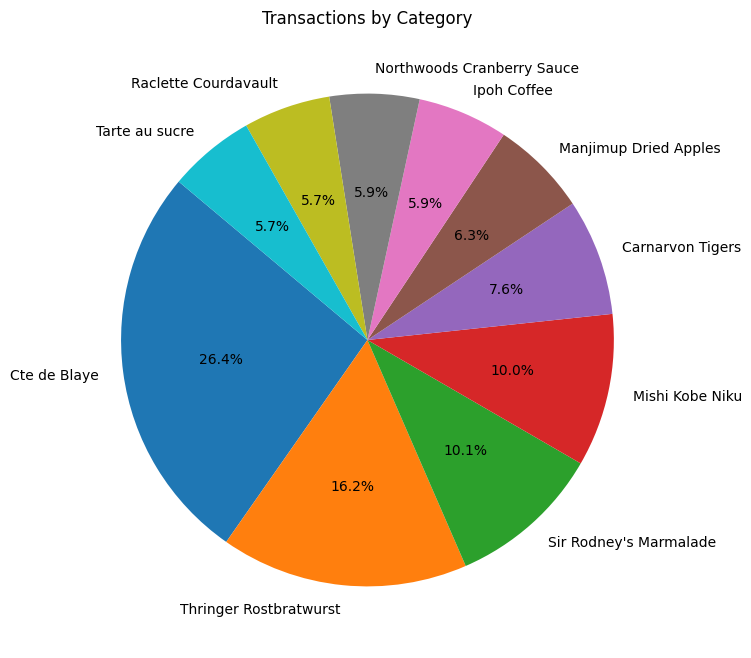

In [13]:
top_categories.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(8, 8))
plt.title("Transactions by Category")
plt.ylabel('')
plt.show()

## Line Plot: Average Monthly Vender Spending

### Shows trends in average monthly transaction amounts over time

### Provides insights into customer behavior and business performance and is a powerful tool for monitoring trends, identifying opportunities or concerns

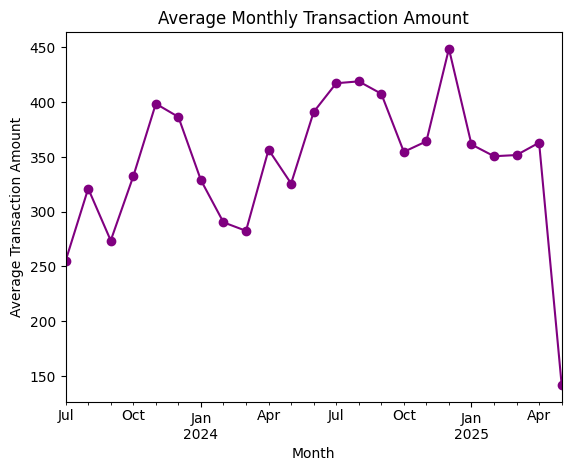

In [14]:
monthly_avg_transaction.plot(kind='line', marker='o', color='purple')
plt.title("Average Monthly Transaction Amount")
plt.xlabel("Month")
plt.ylabel("Average Transaction Amount")
plt.show()